## Bibliotecas

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
brasao = plt.imread('brasaoUFMG.jpg')
print(brasao.shape)

(197, 200, 3)


## Binarização da imagem

In [12]:
def binarizar_imagem(img):
    img_bin = np.zeros((img.shape[0], img.shape[1]))
    
    threshold = 190
    
    for linha in range (img.shape[0]):
        for pixel in range (img.shape[1]):
            
            valor = 0
            for cor in range(img.shape[2]):
                valor += img[linha][pixel][cor]
            valor = valor/3
            
            if ( valor > threshold):
                img_bin[linha][pixel] = 255
    
    
    return img_bin

In [13]:
def mostrar_imagem(imagem):
    plt.imshow(imagem, cmap = 'gray')
    plt.axis('off')
    plt.show()

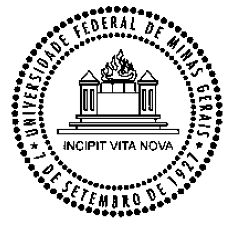

In [14]:
brasao_binario = binarizar_imagem(brasao)
mostrar_imagem(brasao_binario)

## Transformações e operador XOR

In [15]:
def transformar_vetor(vetor):
    vetor_auxiliar = []
    
    for bit in vetor:
        if bit == 0:
            vetor_auxiliar.append(0)
        else:
            vetor_auxiliar.append(255)
            
    return vetor_auxiliar

In [16]:
def xor(bit1, bit2):
    
    if bit1 == bit2:
        resultado = 0 
    else:
        resultado = 255
    
    return resultado

## Cifragem

In [17]:
def cifragem_imagem(img, seq_lfsr):
    
    contador = 0
    
    img_cifrada = np.zeros((img.shape[0], img.shape[1]))
    
    for i in range (img.shape[0]):
        for k in range (img.shape[1]):
            img_cifrada[i][k] = xor(img[i][k], seq_lfsr[contador % len(seq_lfsr)])
            contador += 1
    
    
    return img_cifrada
    

## Testes

In [18]:
lfsr_curto = [0,1,1,0]
lfsr_curto_imagem = transformar_vetor(lfsr_curto)
print(lfsr_curto_imagem)

[0, 255, 255, 0]


In [19]:
imagem_cifrada = cifragem_imagem(brasao_binario, lfsr_curto_imagem)

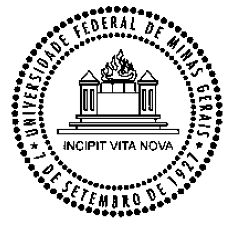

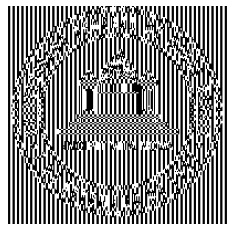

In [20]:
mostrar_imagem(brasao_binario)
mostrar_imagem(imagem_cifrada)

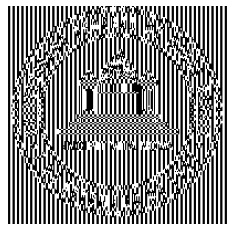

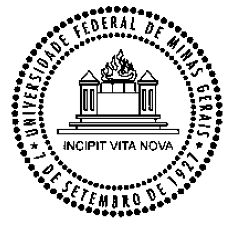

In [22]:
imagem_decifrada = cifragem_imagem(imagem_cifrada, lfsr_curto_imagem)

mostrar_imagem(imagem_cifrada)
mostrar_imagem(imagem_decifrada)

In [ ]:
lfsr_8 = "111111110000101111000110100000001000111000100101110000001100100100110111001000001010110110101100101100001111101101111010111010001000011011000111100111001100010110100100010100101010011101110110011110111111010011001101010001100000111010101011111001010000100"
lfsr_8 = list(lfsr_8)

In [ ]:
lfsr_longo = [int(x) for x in lfsr_8]
lfsr_longo_imagem = transformar_vetor(lfsr_longo)

In [24]:
imagem_cifrada = cifragem_imagem(brasao_binario, lfsr_longo_imagem)

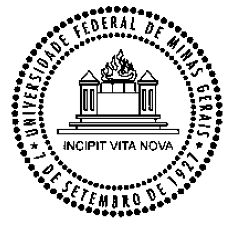

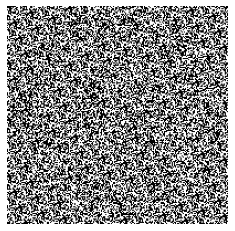

In [25]:
mostrar_imagem(brasao_binario)
mostrar_imagem(imagem_cifrada)

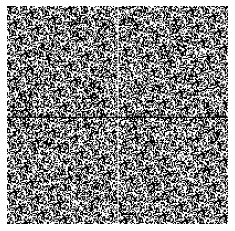

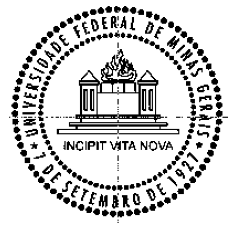

In [33]:
imagem_cifrada[:,100] = 255
imagem_cifrada[100,:] = 0
imagem_decifrada = cifragem_imagem(imagem_cifrada, lfsr_longo_imagem)

mostrar_imagem(imagem_cifrada)
mostrar_imagem(imagem_decifrada)